## ESTUDOS DE REGRESSÃO

In [12]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
#from ISLP import load_data
#from ISLP.models import ModelSpec as MS, summarize, poly

### RESUMO INTRODUCTION TO STATISTICAL LEARNING
**3.1 Regressão Linear Simples** (p. 69)
* **Definição**:
   * Modela a relação entre uma variável resposta Y e uma única variável preditora X.
   * Equação do modelo: Y = β0 + β1X + ϵ.
   * O objetivo é estimar os coeficientes β0 (intercepto) e β1 (inclinação) que minimizam o erro quadrático (RSS - Residual Sum of Squares).    
### **3.1.1 Estimação dos Coeficientes**:
- Os coeficientes são estimados usando o método dos **mínimos quadrados**.
- Fórmulas para $ \beta_0 $ e $ \beta_1 $:
  $
  \displaystyle \beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
  $
  $
  \displaystyle \beta_0 = \bar{y} - \beta_1 \bar{x}
  $
- Essas fórmulas garantem que a linha de regressão seja a que melhor se ajusta aos dados, minimizando a soma dos quadrados dos resíduos.
- Residual Standard Error (RSE):
   $
   \text{RSE} = \sqrt{\frac{1}{n-2} \text{RSS}} = \sqrt{\frac{1}{n-2} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
   $

- Residual Sum of Squares (RSS):
   $
   \text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
   $
- O método dos mínimos quadrados é a técnica utilizada para ajustar uma reta de regressão aos dados. O objetivo desse método é encontrar os coeficientes da reta de regressão $β0$ e $β1$ que minimizam o RSS.
- A função custo (ou função de perda) é uma medida que quantifica o quão bem (ou mal) um modelo de machine learning ou estatístico está performando em relação aos dados observados. Ela calcula a diferença entre os valores previstos pelo modelo e os valores reais (observados). O objetivo de qualquer algoritmo de aprendizado é minimizar a função custo, ajustando os parâmetros do modelo para que ele faça previsões mais precisas. No contexto de regressão linear, a função custo mais comum é o Residual Sum of Squares (RSS).
* **3.1.2 Avaliação do Modelo**:
   * **RSE (Residual Standard Error)**: Mede o desvio padrão dos resíduos. Quanto menor o RSE, melhor o ajuste do modelo.    $
   \text{RSE} = \sqrt{\frac{1}{n-2} \text{RSS}} = \sqrt{\frac{1}{n-2} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
   $
   * **R² (Coeficiente de Determinação)**: Proporção da variância em Y explicada por X. $
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}, \quad \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2
$
   * TSS (Total Sum of Squares, ou Soma Total dos Quadrados) mede a variância total na variável resposta $Y$  e pode ser entendido como a quantidade de variabilidade inerente à resposta antes que a regressão seja realizada.
   * Um valor de R² próximo de 1 indica que o modelo explica grande parte da variabilidade da resposta.
---

### **3.2 Regressão Linear Múltipla** (p. 81)
- **Definição**:
  - Modela a relação entre $ Y $ e várias variáveis preditoras $ X_1, X_2, \dots, X_p $.
  - Equação do modelo: $ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \epsilon $.
- **3.2.1 Estimação dos Coeficientes**:
  - Os coeficientes são estimados minimizando o RSS, agora em um espaço multidimensional.
  - A solução pode ser expressa em forma matricial:
    $ \hat{\beta} = (X^T X)^{-1} X^T Y $
  - Onde $ X $ é a matriz de preditores e $ Y $ é o vetor de respostas.
- **3.2.2 Avaliação do Modelo**:
  - **Teste F**: Verifica se pelo menos um dos preditores tem relação significativa com $ Y $.
    $ F = \frac{(TSS - RSS)/p}{RSS/(n - p - 1)} $
    Um valor grande de $ F $ sugere que pelo menos um preditor é significativo.
  - **Teste t**: Avalia a significância individual de cada coeficiente.
    $ t = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)} $
    Um valor absoluto grande de $ t $ indica que o preditor $ X_j $ é significativo.

---

### **3.3 Seleção de Variáveis** (p. 86)
- **3.3.1 Métodos para Seleção**:
  - **Seleção Forward**: Adiciona preditores um a um, começando com o modelo vazio. Em cada passo, o preditor que mais reduz o RSS é adicionado.
  - **Seleção Backward**: Remove preditores um a um, começando com o modelo completo. Em cada passo, o preditor que menos contribui para o modelo é removido.
  - **Seleção Mista**: Combina forward e backward, permitindo que preditores sejam adicionados ou removidos em cada passo.
- **3.3.2 Critérios de Seleção**:
  - **R² Ajustado**: Penaliza a adição de preditores irrelevantes.
    $ R^2_{\text{ajustado}} = 1 - \frac{RSS/(n - p - 1)}{TSS/(n - 1)} $
  - **Cp de Mallow**, **AIC**, **BIC**: Medem o trade-off entre ajuste e complexidade.
    - $ C_p = \frac{RSS}{\hat{\sigma}^2} + 2p$, onde o $C_p$ deve ser o mais proximo do número de features possível  
    - $\quad AIC = n \log(RSS) + 2p$, onde AIC deve ser o menor possível
    -  $\quad BIC = n \log(RSS) + p \log(n)$, menor possível

---

### **3.4 Interações e Termos Não Lineares** (p. 95)

- **3.4.1 Interações**:<br>
  - Permitem que o efeito de um preditor dependa do valor de outro.<br>
  - Exemplo: $ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \epsilon $.<br>
  - O termo de interação $ X_1 X_2 $ captura a sinergia entre os preditores.<br>
  - Efeito sobre Y é a soma dos coeficientes
- **3.4.2 Termos Não Lineares**:<br>
  - Podem ser incluídos usando transformações (e.g., $ X^2 $, $ \log(X) $).<br>
  - Exemplo: $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon $.<br>
  - Isso permite que o modelo capture relações não lineares entre $ X $ e $ Y $.<br>
  - Usa-se esse termo quando a relacão é curvilinea ou tem algum resquisio nao linear, mas nao é complexa como deve ser para ser usada a regressao polinomial.

---

### **3.5 Problemas Potenciais em Regressão Linear** (p. 100)

- **3.5.1 Não Linearidade**:  
  A relação entre $ Y $ e $ X $ pode não ser linear. Solução: usar transformações ou modelos não lineares.  
- **3.5.2 Correlação dos Erros**:  
  Erros correlacionados podem invalidar inferências. Comum em dados temporais.  
- **3.5.3 Heterocedasticidade**:  
  Variância dos erros não é constante. Solução: transformar $ Y $ ou usar mínimos quadrados ponderados.  
- **3.5.4 Outliers e Pontos de Alavancagem**:  
  Observações extremas podem distorcer o modelo. Solução: identificar e remover outliers.  
- **3.5.5 Multicolinearidade**:  
  Preditores altamente correlacionados podem inflar a variância das estimativas. Solução: remover preditores redundantes ou usar técnicas como PCA.  

---

### **3.6 Comparação com K-Nearest Neighbors (KNN)** (p. 111)

- **3.6.1 KNN**:  
  Método não paramétrico que prevê $Y$ com base nos $K$ vizinhos mais próximos.  
  Vantagem: flexibilidade para capturar relações não lineares.  
  Desvantagem: desempenho ruim em alta dimensionalidade (maldição da dimensionalidade).
- **3.6.2 Comparação**:  
  Regressão linear é melhor quando a relação verdadeira é linear ou próxima disso.  
  KNN pode ser superior em relações não lineares, mas sofre com o aumento do número de preditores.


# Regressão - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow

### Comparação entre Métodos de Otimização em Regressão Linear (HOML)

| *Método*               | *Quando Usar*                                                                 | *Vantagens*                                                                 | *Desvantagens*                                                                 |
|--------------------------|---------------------------------------------------------------------------------|------------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| *Equação Normal*       | Quando o número de features é pequeno (n < 1000) e o dataset cabe na memória.   | - Solução exata e direta. <br> - Não precisa ajustar hiperparâmetros.         | - Ineficiente para datasets grandes (O(n³)). <br> - Não funciona bem com colinearidade. |
| *SVD (Singular Value Decomposition)* | Quando a matriz de features é singular ou quase singular.                     | - Mais estável que a equação normal. <br> - Lida bem com colinearidade.       | - Computacionalmente caro para datasets grandes. <br> - Complexidade O(n²).       |
| *Gradiente Descendente Batch* | Quando o dataset é grande, mas cabe na memória.                              | - Convergência estável. <br> - Fácil de implementar.                         | - Lento para datasets muito grandes. <br> - Pode ficar preso em mínimos locais.   |
| *Gradiente Descendente Estocástico (SGD)* | Quando o dataset é muito grande e não cabe na memória.                     | - Mais rápido para datasets grandes. <br> - Escalável.                       | - Convergência instável. <br> - Pode oscilar em torno do mínimo.                  |
| *Gradiente Descendente Mini-Batch* | Quando o dataset é grande, mas você quer um equilíbrio entre velocidade e estabilidade. | - Combina velocidade do SGD com estabilidade do Batch. <br> - Escalável.     | - Requer ajuste do tamanho do batch. <br> - Pode oscilar, mas menos que o SGD.    |

### **Regressão Polinomial**
- **Definição**:
  - A Regressão Polinomial permite usar modelos lineares para ajustar dados não lineares, adicionando potências das características como novas características.  
  - Equação do modelo:
    $$
    y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n + \epsilon
    $$
#### **Exemplo de Geração de Dados Não Lineares**
- Dados gerados com base em uma equação quadrática:  
  $$
  y = 0.5x^2 + x + 2 + \text{ruído}
  $$
#### **Transformação com `PolynomialFeatures`**
- Adiciona potências das características ao conjunto de dados. Por exemplo, para um polinômio de segundo grau:
  $$
  X_{\text{poly}} = [x, x^2]
  $$
#### **Ajuste do Modelo de Regressão Linear**
- O modelo ajustado estima os coeficientes $ \beta_0, \beta_1, \beta_2 $


In [14]:
#Gera dados nao lineares
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.06251241]), array([[1.0719003 , 0.46158904]]))

### **Curvas de Aprendizado**
- **Definição**:
  - Gráficos que mostram o desempenho do modelo no conjunto de treinamento e validação em função do tamanho do conjunto de treinamento.
  - Úteis para diagnosticar **underfitting** e **overfitting**.

In [16]:
#Funcao para plotar as curvas e aprendizado
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

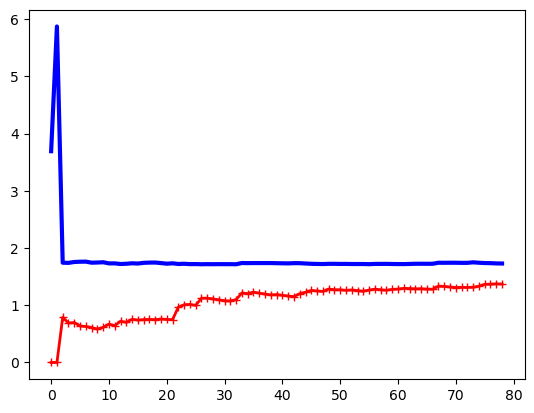

In [24]:
#Curvas para a regressão linear
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

#O modelo parece que se ajustou bem. O plato esta proximo de 2

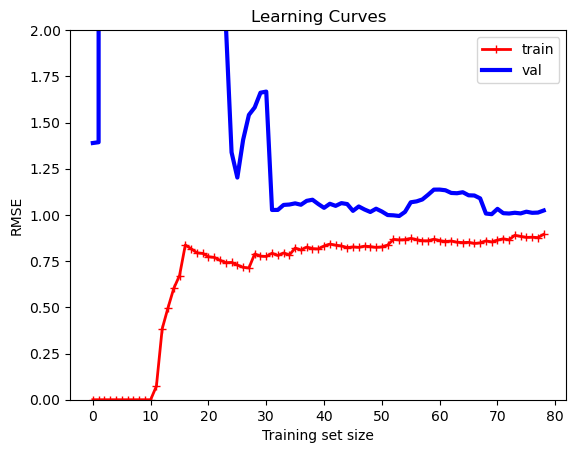

In [28]:
from sklearn.pipeline import Pipeline

# Função para plotar as curvas de aprendizado
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    # Plotando as curvas
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
    # Ajustando os limites do eixo y para focar na região da linha vermelha
    plt.ylim(0, 2)  # Ajuste os valores conforme necessário
    
    # Adicionando legendas e título
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("Learning Curves")

# Criando o pipeline de regressão polinomial
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

# Plotando as curvas de aprendizado
plot_learning_curves(polynomial_regression, X, y)
plt.show()

In [299]:
#Erro do treinamento é bem menor que no regressao anterior
#Tem um espaco entre as linhas o que mostra que o modelo tem um desempenho melhor no treinamento
#o que pode significar que um maior dataset pode fazer as curvas se aproximarem

### **Trade-off entre Viés e Variância**
- **Definição**:
  - O erro de generalização de um modelo pode ser decomposto em:
    1. **Viés**: Erro devido a suposições incorretas no modelo.
    2. **Variância**: Erro devido à sensibilidade excessiva do modelo a pequenas variações nos dados de treinamento.
    3. **Erro Irredutível**: Erro devido ao ruído inerente aos dados.

---

## **Modelos Lineares Regularizados**
- **Definição**:
  - Técnicas que adicionam restrições aos pesos do modelo para reduzir o overfitting.

### REGRESSÃO RIDGE
**Regressão Ridge** (Regularização L2)
* **Definição**:
   * Técnica de regularização usada em modelos de regressão linear para lidar com multicolinearidade e evitar sobreajuste (*overfitting*).
   * Adiciona uma penalização proporcional ao quadrado dos coeficientes (norma L2) à função de custo.
   * Equação do modelo: $ \text{Custo} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 $.

#### **Características Principais**:
1. **Regularização L2**: Penaliza o quadrado dos coeficientes (não os zera).
2. **Controle de sobreajuste**: Reduz a magnitude dos coeficientes, tornando o modelo menos sensível a variações nos dados de treinamento.
3. **Multicolinearidade**: Útil quando há alta correlação entre variáveis independentes, estabilizando as estimativas dos coeficientes.
4. **Coeficientes não zerados**: Diferente da regressão Lasso, a Ridge apenas reduz os coeficientes, sem zerá-los.

#### **Escolha do Parâmetro $ \lambda $**:
- Se $ \lambda = 0 $: A regressão Ridge se reduz à regressão linear comum.
- Se $ \lambda $ é muito grande: Os coeficientes são excessivamente penalizados, podendo causar subajuste (*underfit*).
- O valor ideal de $ \lambda $ é geralmente encontrado por validação cruzada (*cross-validation*).

#### **Quando Usar?**
- Quando há multicolinearidade entre as variáveis independentes.
- Quando se deseja evitar sobreajuste em modelos com muitas variáveis.
- Quando se quer um modelo mais estável e generalizável.

### REGRESSÃO LASSO
**Regressão Lasso** (Regularização L1)
* **Definição**:
   * Técnica de regularização usada em modelos de regressão linear para lidar com multicolinearidade e evitar sobreajuste (*overfitting*).
   * Adiciona uma penalização proporcional ao valor absoluto dos coeficientes (norma L1) à função de custo.
   * Equação do modelo: $ \text{Custo} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j| $.

#### **Características Principais**:
1. **Regularização L1**: Penaliza o valor absoluto dos coeficientes, podendo zerar alguns deles.
2. **Seleção de variáveis**: Por zerar coeficientes de variáveis menos importantes, o Lasso realiza automaticamente a seleção de variáveis.
3. **Controle de sobreajuste**: Reduz a magnitude dos coeficientes, tornando o modelo menos sensível a variações nos dados de treinamento.
4. **Multicolinearidade**: Útil quando há alta correlação entre variáveis independentes, pois tende a selecionar apenas uma delas.

#### **Escolha do Parâmetro $ \lambda $**:
- Se $ \lambda = 0 $: A regressão Lasso se reduz à regressão linear comum.
- Se $ \lambda $ é muito grande: Muitos coeficientes são zerados, podendo causar subajuste (*underfit*).
- O valor ideal de $ \lambda $ é geralmente encontrado por validação cruzada (*cross-validation*).

#### **Quando Usar?**
- Quando há multicolinearidade entre as variáveis independentes.
- Quando se deseja realizar seleção de variáveis automaticamente.
- Quando se quer um modelo esparso (com menos variáveis) e interpretável.

### RESUMO ELASTIC NET
**Elastic Net** (Combinação de Regularização L1 e L2)
* **Definição**:
   * Técnica de regularização que combina as penalizações da regressão Lasso (L1) e Ridge (L2).
   * Útil quando há multicolinearidade, muitas variáveis ou quando se deseja um equilíbrio entre seleção de variáveis e redução de coeficientes.
   * Equação do modelo: $ \text{Custo} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \left( \alpha \sum_{j=1}^{p} |\beta_j| + \frac{(1 - \alpha)}{2} \sum_{j=1}^{p} \beta_j^2 \right) $.

#### **Características Principais**:
1. **Combinação de L1 e L2**: Penaliza tanto o valor absoluto (L1) quanto o quadrado (L2) dos coeficientes.
2. **Seleção de variáveis**: Herda a capacidade do Lasso de zerar coeficientes de variáveis menos importantes.
3. **Estabilidade**: Herda a estabilidade da Ridge em casos de multicolinearidade.
4. **Controle de sobreajuste**: Reduz a magnitude dos coeficientes e seleciona variáveis, evitando sobreajuste.

#### **Escolha dos Parâmetros $ \lambda $ e $ \alpha $**:
- $ \lambda $: Controla a força da regularização.
   - Se $ \lambda = 0 $: O modelo se reduz à regressão linear comum.
   - Se $ \lambda $ é muito grande: Pode causar subajuste (*underfit*).
- $ \alpha $: Controla a proporção entre L1 e L2.
   - Se $ \alpha = 1 $: Elastic Net se reduz à regressão Lasso.
   - Se $ \alpha = 0 $: Elastic Net se reduz à regressão Ridge.
   - Valores intermediários (ex.: $ \alpha = 0.5 $) equilibram L1 e L2.
- Os valores ideais de $ \lambda $ e $ \alpha $ são geralmente encontrados por validação cruzada (*cross-validation*).

#### **Quando Usar?**
- Quando há multicolinearidade entre as variáveis independentes.
- Quando o número de variáveis é maior que o número de observações (\( p > n \)).
- Quando se deseja um equilíbrio entre seleção de variáveis (Lasso) e estabilidade (Ridge).

### **Parada Antecipada (Early Stopping)**
- **Definição**:
  - Interrompe o treinamento quando o erro de validação atinge um mínimo.
  - Evita overfitting ao parar o treinamento antes que o modelo comece a se ajustar demais aos dados de treinamento.